In [ ]:
import matplotlib.pyplot as plt
# for plot styling
import seaborn as sns; sns.set()  
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

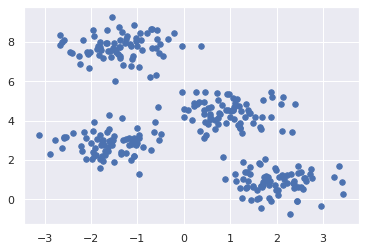

In [ ]:
# manually generating dataset
# using the make_blobs() function and storing the return value to X and y_true
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
# plotting the dataset using plt.scatter()
plt.scatter(X[:,0], X[:,1], s=30, c='b', marker="o")

In [ ]:
# using sklearn api to visualize the clustering result by first creating the kmeans object, fitting the data and making prediction
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

Locations of centers: 

[[ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]] 



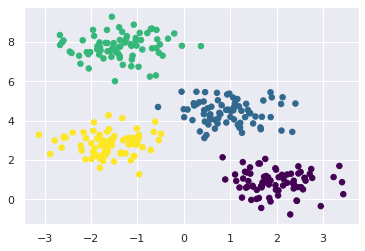

In [ ]:
# visualizing the clustering result
# setting the colormap to virdis
plt.viridis()
plt.scatter(X[:, 0], X[:, 1], s=30, c=pred_y)
# storing the centers to a variable using kmeans.cluster_centers_
centers = kmeans.cluster_centers_
# plot the center points using the plt.scatter() 
print("Locations of centers: \n")
print(centers, "\n")

Locations of centers: 

[[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]] 



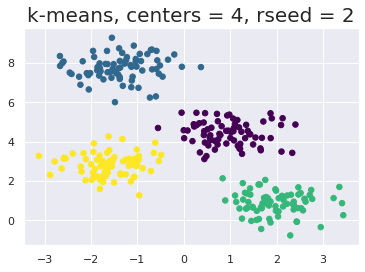

In [ ]:
#Fitting the data using K-means function (without scikit-learn)

def k_means(X, n_clusters, rseed=2, centers=np.array([])):
  # it's easier to pass centers as an array argument to this function later on
    if centers.shape[0] == 0:
        # using np.random.RandomState first to set the seed and store it to a variable r
        r = np.random.RandomState(rseed)
        # using r.permutation(data shape) to choose first k data point index as initial center
        k = r.permutation(X.shape[0])[:n_clusters]
        # storing the center to a list
        centers = X[k]
    # repeat until convergence
    while True:
        # assigning labels
        labels = pairwise_distances_argmin(X, centers)
        # finding new centers from means of points
        # updating centroid of each cluster to be the average(mean) of examples assigned to cluster k
        updated = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        # checking for convergence: if old center is new center there is convergence
        if np.all(centers == updated):
            break
        centers = updated
    # returning the centers and labels
    return centers, labels

# fitting the function to the data set with the starting point rseed=2.
# plotting the figure
plt.viridis()
centers, labels = k_means(X, 4)
plt.title('k-means, centers = 4, rseed = 2', fontsize=20)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30)
print("Locations of centers: \n")
print(centers, "\n")

Locations of centers: 

[[-1.37324398  7.75368871]
 [ 1.95636329  1.46879371]
 [-0.35164179  3.62712721]
 [ 2.01881381  0.44148546]] 



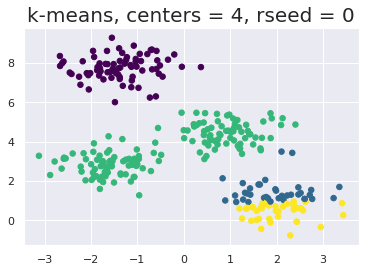

In [ ]:
# fitting our function to the data set with the starting point rseed=0.
# plotting the figure
centers, labels = k_means(X, 4, 0)
plt.viridis()
plt.title('k-means, centers = 4, rseed = 0', fontsize=20)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30)
print("Locations of centers: \n")
print(centers, "\n")

Locations of centers: 

[[ 0.89389302  4.88677525]
 [-1.37324398  7.75368871]
 [ 1.01023116  3.91238737]
 [-1.19105771  3.20054787]
 [ 1.98258281  0.86771314]
 [-1.89342728  2.54030637]] 



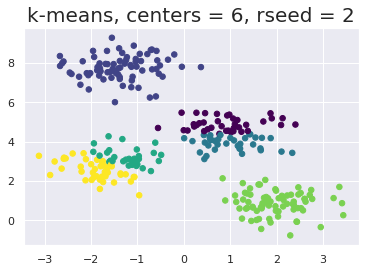

In [ ]:
# fit our function to the data set with the starting point rseed=2 k=6.
# plot the figure
centers, labels = k_means(X, 6)
plt.viridis()
plt.title('k-means, centers = 6, rseed = 2', fontsize=20)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30)
print("Locations of centers: \n")
print(centers, "\n")

In [ ]:
# initializing centers for kmean++
def eucl_dist(a, b):
    return np.sqrt(np.sum((a-b)**2))

def init_center(k,X,rseed):
    # setting the seed and storing it to a variable r
    r = np.random.RandomState(rseed)
    # using data shape to choose first data point index as initial center
    i = r.permutation(X.shape[0])[0]
    # creating a list to store centers 
    centers = [X[i]]
    # while the length of the list less than k:
    for m in range(1,k):
        # calculating dj for all data point: dj=min(||x^j-c_k||) whiere dj stores the distance to the cloest center
        dj =  np.array([np.min([eucl_dist(xj, c) for c in centers]) for xj in X])
        # calculating pj: pj=dj^2/sum_all(d^2) for all data points
        probability = np.cumsum((np.square(dj))/(np.sum(np.square(dj))))
        # random choose using the probability
        r = np.random.choice(probability)
        i=0
        for j, p in enumerate(probability):
            if r < p:
                i = j
                break
        # appending new center to centers list
        centers.append(X[i])
    # returning all centers
    return np.array(centers)

print("Centers locations for k-means++, centers=4, rseed=2:")
print(init_center(4, X, 2))

Centers locations for k-means++, centers=4, rseed=2:
[[ 0.27239604  5.46996004]
 [ 1.34195197  0.59357385]
 [-2.2569867   7.3020772 ]
 [ 0.89349964  1.01093082]]


In [ ]:
def kmpp(X, n_clusters, rseed):
    # first init centers
    centers = init_center(4, X, rseed)
    # then, running the k-means with the initialized centers
    centers, labels = k_means(X, 4, centers=centers)
    return centers, labels

Locations of centers: 

[[-0.33514647  3.62624134]
 [-1.73102222  7.43349916]
 [ 1.98726097  0.90144281]
 [-0.89247947  8.18394342]] 



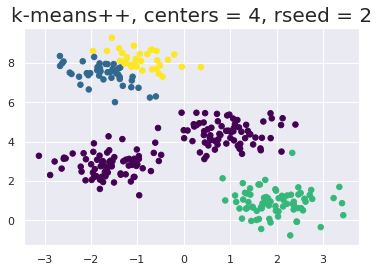

In [ ]:
# fitting our kmean++ function to the data set with rseed=2
# plotting the figure
centers, labels = kmpp(X,4,2)
plt.viridis()
plt.title('k-means++, centers = 4, rseed = 2', fontsize=20)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30)
print("Locations of centers: \n")
print(centers, "\n")

In [ ]:
# fit our kmean++ function to the data set with rseed=0.
# plot the figure
centers, labels = kmpp(X,4,0)
plt.viridis()
plt.title('k-means++, centers = 4, rseed = 0', fontsize=20)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30)
print("Locations of centers: \n")
print(centers, "\n")

When it comes to kmeans, clustering results in rseed=0 and rseed=2 visualizations appear to be slightly different since the seed generator produces completely random values as the start points for the algorithm,
resulting in choosing far-off points as centers. 

In case a centroid is initialized to be a far-off point, we may end up having no points associated with it, more than one cluster linked with a single centroid, or more than one centers in the same cluster. 
On the other hand, we can see that the visualizations of rseed=0 and rseed=2 for Kmeans++ are not different. We can conclude that Kmeans++ allows the smarter initialization of the centroids while improving the quality of the clustering.